In this notebook, we log transform some plots from
[Scaling Laws for Neural Language Models](https://arxiv.org/abs/2001.08361).

### Load libraries

In [1]:
import pathlib

import git.repo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

GIT_ROOT = pathlib.Path(
    str(git.repo.Repo(".", search_parent_directories=True).working_tree_dir)
)

### Load data

In [2]:
df = pd.read_csv(GIT_ROOT / 'data/kaplan-2020/wpd-clean.csv')
df.head()

,topx,topy,botx,boty,midx,midy
0,1.670929e+06,10.856,6.296758e+05,10.764364,9.650448e+05,10.856
1,2.613476e+06,10.856,9.848668e+05,10.621818,2.509334e+06,10.824
2,4.087700e+06,10.856,1.540416e+06,10.477818,3.545430e+06,10.824
3,6.393512e+06,10.856,2.409342e+06,10.332364,6.935210e+06,10.792
4,1.000000e+07,10.856,3.768417e+06,10.184000,1.041502e+07,10.792


### Plot data

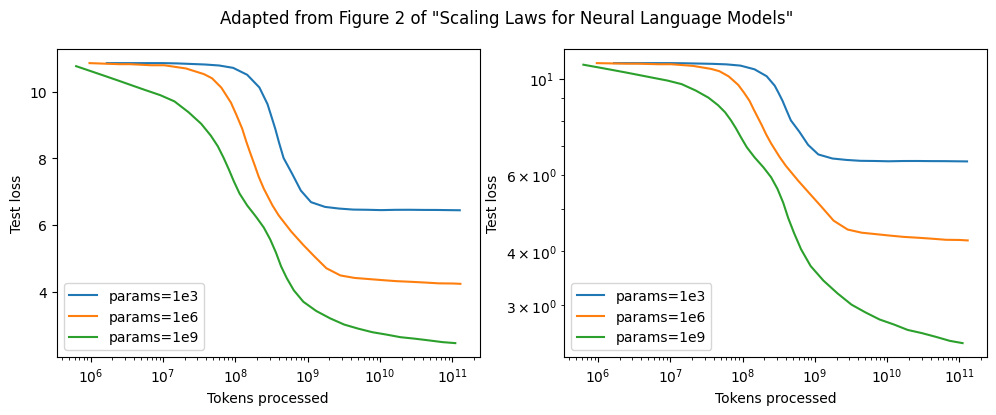

In [3]:
plt.figure(figsize=(12, 4))
plt.suptitle(
    'Adapted from Figure 2 of "Scaling Laws for Neural Language Models"'
)
for i in range(2):
    plt.subplot(1, 2, i + 1)
    for xname, yname, params in (
        ("topx", "topy", "1e3"),
        ("midx", "midy", "1e6"),
        ("botx", "boty", "1e9"),
    ):
        cdf = df[[xname, yname]].dropna().sort_values(xname)
        plt.plot(
            cdf[xname],
            cdf[yname],
            label=f"params={params}",
        )  # type: ignore

    plt.xscale("log")
    plt.xlabel("Tokens processed")
    plt.ylabel("Test loss")

    # Legend in bottom left of plot
    plt.legend(loc="lower left")

    if i == 1:
        plt.yscale("log")